In [47]:
#pip install python-binance

import pandas as pd
import pandas_ta as ta
import numpy as np
import time
from binance.client import Client
from binance import AsyncClient, BinanceSocketManager
from datetime import datetime as dt
from datetime import date
import datetime

In [48]:
# https://python-binance.readthedocs.io/en/latest/overview.html#initialise-the-client
api_key = "....."
api_secret = "....."
client = Client(api_key, api_secret)

In [49]:
periods = {
    '1m': Client.KLINE_INTERVAL_1MINUTE,
    '3m': Client.KLINE_INTERVAL_3MINUTE,
    '5m': Client.KLINE_INTERVAL_5MINUTE,
    '15m': Client.KLINE_INTERVAL_15MINUTE,
    '30m': Client.KLINE_INTERVAL_30MINUTE,
    '1h': Client.KLINE_INTERVAL_1HOUR,
    '2h': Client.KLINE_INTERVAL_2HOUR,
    '4h': Client.KLINE_INTERVAL_4HOUR,
    '6h': Client.KLINE_INTERVAL_6HOUR,
    '8h': Client.KLINE_INTERVAL_8HOUR,
    '12h': Client.KLINE_INTERVAL_12HOUR,
    '1d': Client.KLINE_INTERVAL_1DAY,
    '3d': Client.KLINE_INTERVAL_3DAY,
    '1w': Client.KLINE_INTERVAL_1WEEK,
    '1M': Client.KLINE_INTERVAL_1MONTH
}

# Selection of timeframe
def periodInput():
    print('PERIODS')
    for i in periods:
        print(i)
    print('########################')
    choise = input("Please chose period : ")
    return periods.get(choise)

def inputTimeFrame(t):
    if t == 0:
        print("Please input date as shown ==>> 16 September 2020")
        choice = input("Provide start date : ")
    elif t == 1:
        today = date.today()
        # Textual month, day and year	
        t2 = today.strftime("%d %B %Y")
        choice = t2 
    else:
        choice = 0

    return choice

    

In [50]:
def Coin():
    
    
    all_pairs = pd.DataFrame(client.get_ticker())

    # Pair of USDT -- SPOT
    relev = all_pairs[all_pairs.symbol.str.endswith("USDT")]
    non_lev = relev[~((relev.symbol.str.contains("UP")) | (relev.symbol.str.contains("BULL")) |(relev.symbol.str.contains("BEAR")) | (relev.symbol.str.contains("DOWN")))]
    spot_coins_usdt = non_lev.symbol.to_list()

    # Pairs of BUSD -- SPOT
    rel = all_pairs[all_pairs.symbol.str.endswith("BUSD")]
    n_lev = rel[~((rel.symbol.str.contains("UP")) | (rel.symbol.str.contains("BULL")) |(rel.symbol.str.contains("BEAR")) | (rel.symbol.str.contains("DOWN")))]
    spot_coins_busd = n_lev.symbol.to_list()

     # Pair of USDT -- FUTURES
    futures_exchange_info = client.futures_exchange_info()  # request info on all futures symbols
    trading_pairs = [info['symbol'] for info in futures_exchange_info['symbols']]
    futures_all_pairs = pd.DataFrame(trading_pairs)
    futures_relev_usdt = futures_all_pairs[futures_all_pairs[0].str.endswith("USDT")]
    futures_coins_usdt = futures_relev_usdt[0].to_list()

    # Pair of BUSD -- FUTURES
    futures_relev_busd = futures_all_pairs[futures_all_pairs[0].str.endswith("BUSD")]
    futures_coins_busd = futures_relev_busd[0].to_list()
    
    pair = input("Please provide pair: USDT or BUSD")
    pair = pair.upper()
    stock = input("Please provide Historical klines type: SPOT or FUTURES")
    stock = stock.upper()
    
    if stock == "SPOT" and pair == "USDT":
        print(spot_coins_usdt)
        selection = input("Please type coin name as shown ==>> BTC,ETC,SOL ...")
        selection = selection.upper()
        choice = str(selection) + str(pair)
        if choice in spot_coins_usdt:
            print(choice," ",stock)
            
        else: print("try again")
    
    elif stock == "SPOT" and pair == "BUSD":
        print(spot_coins_busd)
        selection = input("Please type coin name as shown ==>> BTC,ETC,SOL ...")
        selection = selection.upper()
        choice = str(selection) + str(pair)
        if choice in spot_coins_busd:
            print(choice," ",stock)
            
        else: print("try again")


    elif stock == "FUTURES" and pair == "USDT":
        print(futures_coins_usdt)
        selection = input("Please type coin name as shown ==>> BTC,ETC,SOL ...")
        selection = selection.upper()
        choice = str(selection) + str(pair)
        if choice in futures_coins_usdt:
            print(choice," ",stock)
                   
        else: print("try again")
    elif stock == "FUTURES" and pair == "BUSD":
        print(futures_coins_busd)
        selection = input("Please type coin name as shown ==>> BTC,ETC,SOL ...")
        selection = selection.upper()
        choice = str(selection) + str(pair)
        if choice in futures_coins_busd:
            print(choice," ",stock)
            
        else: print("try again")
    
    return choice, stock


In [51]:
# Gettinh historical data
def gethistoricaldata(symbol, stock, interval, start, end):
    
    Name = pair[0]
    
    if stock == "SPOT":
        frame = pd.DataFrame(client.get_historical_klines(symbol=symbol, interval=interval, start_str = start, end_str=end))
        frame = frame.iloc[:,:6]
        frame.columns = ["Time","Open","High","Low","Close","Volume"]
        frame = frame.set_index("Time")
        frame = frame.astype(float)
        frame.index = pd.to_datetime(frame.index, unit = "ms")
        frame.to_csv(Name+"_SPOT.csv")
        
        
    else:
        frame = pd.DataFrame(client.futures_historical_klines(symbol=symbol, interval=interval, start_str = start, end_str=end))
        frame = frame.iloc[:,:6]
        frame.columns = ["Time","Open","High","Low","Close","Volume"]
        frame = frame.set_index("Time")
        frame = frame.astype(float)
        frame.index = pd.to_datetime(frame.index, unit = "ms")
        frame.to_csv(Name+"_FUTURES.csv")
        

    return frame

In [52]:
pair = Coin()
df = gethistoricaldata(pair[0], pair[1],periodInput(),inputTimeFrame(0),inputTimeFrame(1) )
df

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

,Open,High,Low,Close,Volume
Time,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,471.659
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759
...,...,...,...,...,...
2022-06-09 20:00:00,30003.80,30193.00,29952.60,30178.90,15004.318
2022-06-09 21:00:00,30178.90,30244.20,30118.60,30125.90,5712.940
2022-06-09 22:00:00,30125.80,30150.00,29999.10,30058.90,9394.750


In [53]:
# Adding some of technical indicators from the library of pandas_ta
def add_ta_features():
    filenames = os.listdir()
    csvName =  pair[0]+"_"+pair[1]+".csv"
    list = [ filename for filename in filenames if filename == csvName]
    data = pd.read_csv(list[0], parse_dates=True, index_col="Time")
    data = data.astype(float)
    #https://github.com/twopirllc/pandas-ta
    # Adding some useful financial indicators
    custom_strategy = ta.Strategy(name="My Strategy", ta=[{"kind": "ema", "length": 8}, {"kind": "ema", "length": 21}, 
                                         {"kind": "ema", "length": 50}, {"kind": "ema", "length": 200}, 
                                         {"kind": "log_return", "cumulative": True}, {"kind": "rsi"}, 
                                         {"kind": "supertrend"},{"kind":"macd"},
                                         {"kind":"bbands", "close": "MACD_12_26_9", "length": 20, "ddof": 0, "prefix": "MACD"}                                     
                                        
                                        ])
    
    data.ta.strategy(custom_strategy)
    data = data.astype(float)
    
    
    return data
    
    


In [54]:
data = add_ta_features()
data.head()


,Open,High,Low,Close,Volume,EMA_8,EMA_21,EMA_50,EMA_200,CUMLOGRET_1,RSI_14,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Time,,,,,,,,,,,,,,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,471.659,NaN,NaN,NaN,NaN,0.033446,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271,NaN,NaN,NaN,NaN,0.034539,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759,NaN,NaN,NaN,NaN,0.038442,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [55]:
df = data.copy()
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_8', 'EMA_21', 'EMA_50',
       'EMA_200', 'CUMLOGRET_1', 'RSI_14', 'SUPERT_7_3.0', 'SUPERTd_7_3.0',
       'SUPERTl_7_3.0', 'SUPERTs_7_3.0', 'MACD_12_26_9', 'MACDh_12_26_9',
       'MACDs_12_26_9'],
      dtype='object')

<AxesSubplot:>

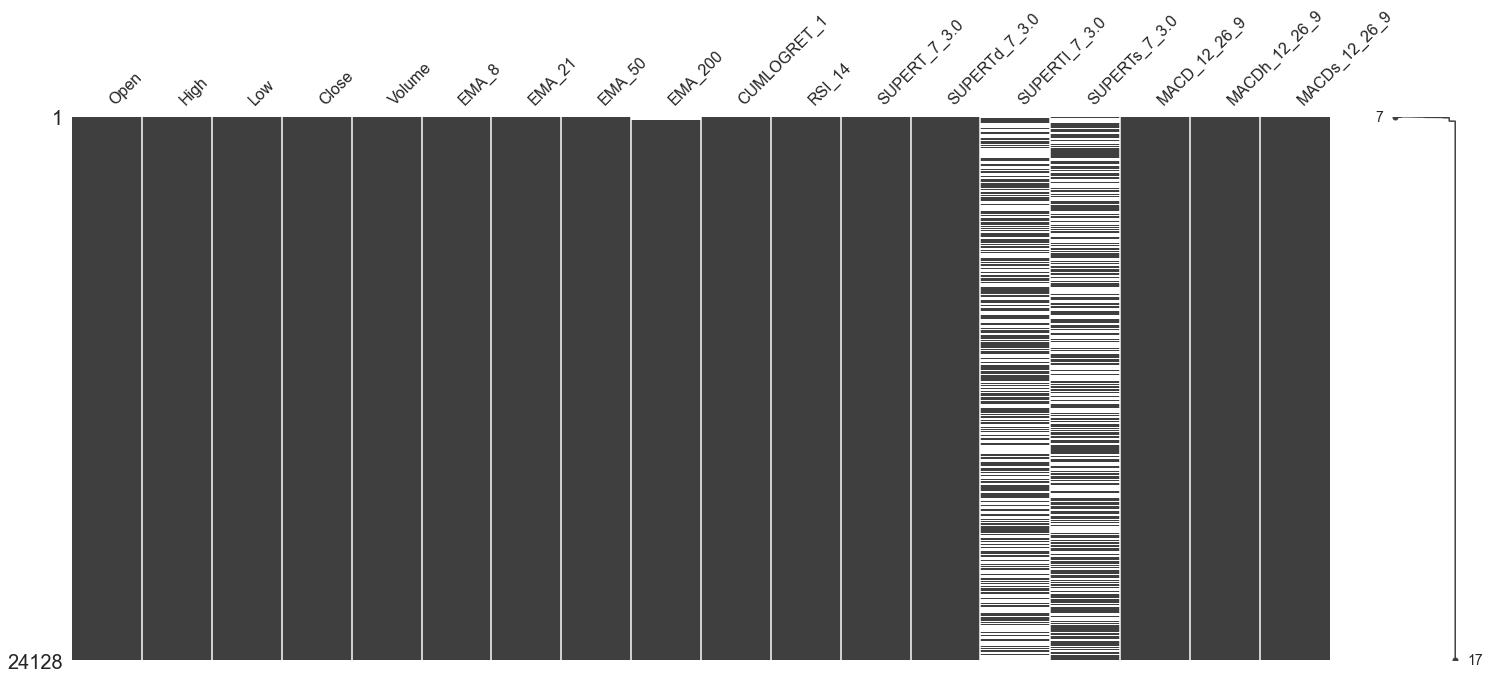

In [56]:
# Visualize missing values
# pip install missingno
import missingno as msno
msno.matrix(df)

In [57]:
# Checking if last row of each columns has missing values 
# This code below is helpful once there are more than screenable columns in dataset and you can't see if there are any columns still have missing values
dropped_col = []
for j in df.columns:
    a = df.iloc[-1:,:]
    if (a[j].isnull()[0]) == True:
        dropped_col.append(j)
dropped_col

['SUPERTl_7_3.0']

In [58]:
# Drop columns that has/have missing value in last row
df = df.drop(columns = dropped_col,axis = 1)
df.dropna(axis = 0, inplace = True)
df.tail()

,Open,High,Low,Close,Volume,EMA_8,EMA_21,EMA_50,EMA_200,CUMLOGRET_1,RSI_14,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTs_7_3.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Time,,,,,,,,,,,,,,,,,
2022-06-09 20:00:00,30003.8,30193.0,29952.6,30178.9,15004.318,30189.858261,30252.645352,30313.489479,30272.750100,1.104558,46.897848,30783.033275,-1.0,30783.033275,-52.923820,-14.903527,-38.020293
2022-06-09 21:00:00,30178.9,30244.2,30118.6,30125.9,5712.940,30175.645314,30241.123047,30306.133028,30271.288905,1.102800,45.280896,30783.033275,-1.0,30783.033275,-56.131528,-14.488988,-41.642540
2022-06-09 22:00:00,30125.8,30150.0,29999.1,30058.9,9394.750,30149.701911,30224.557316,30296.437616,30269.175583,1.100574,43.250777,30715.588739,-1.0,30715.588739,-63.349743,-17.365763,-45.983980
2022-06-09 23:00:00,30058.9,30118.2,29963.9,30093.3,7810.195,30137.168153,30212.624833,30288.471435,30267.425577,1.101717,44.623554,30656.640348,-1.0,30656.640348,-65.538946,-15.643973,-49.894974
2022-06-10 00:00:00,30093.4,30139.7,29470.5,29849.9,31277.124,30073.330785,30179.649848,30271.272555,30263.271094,1.093596,37.678433,30619.548869,-1.0,30619.548869,-85.923775,-28.823041,-57.100734


In [59]:
df["SUPERTd_7_3.0"].value_counts()

-1.0    12274
Name: SUPERTd_7_3.0, dtype: int64

In [60]:
df.drop(("SUPERTd_7_3.0"),axis = 1,inplace=True)

In [61]:
df.shape

(12274, 16)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12274 entries, 2019-09-19 02:00:00 to 2022-06-10 00:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           12274 non-null  float64
 1   High           12274 non-null  float64
 2   Low            12274 non-null  float64
 3   Close          12274 non-null  float64
 4   Volume         12274 non-null  float64
 5   EMA_8          12274 non-null  float64
 6   EMA_21         12274 non-null  float64
 7   EMA_50         12274 non-null  float64
 8   EMA_200        12274 non-null  float64
 9   CUMLOGRET_1    12274 non-null  float64
 10  RSI_14         12274 non-null  float64
 11  SUPERT_7_3.0   12274 non-null  float64
 12  SUPERTs_7_3.0  12274 non-null  float64
 13  MACD_12_26_9   12274 non-null  float64
 14  MACDh_12_26_9  12274 non-null  float64
 15  MACDs_12_26_9  12274 non-null  float64
dtypes: float64(16)
memory usage: 1.6 MB


In [63]:
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
EMA_8            0
EMA_21           0
EMA_50           0
EMA_200          0
CUMLOGRET_1      0
RSI_14           0
SUPERT_7_3.0     0
SUPERTs_7_3.0    0
MACD_12_26_9     0
MACDh_12_26_9    0
MACDs_12_26_9    0
dtype: int64

In [64]:
#Stastical analysis of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,12274.0,28354.867141,18417.848370,4062.950000,9293.232500,30795.965000,43498.800000,67870.980000
High,12274.0,28516.371651,18526.830934,4598.000000,9320.840000,31222.280000,43732.357500,68087.090000
Low,12274.0,28156.317342,18285.050695,3621.810000,9255.110000,30454.550000,43210.487500,66720.520000
Close,12274.0,28338.176107,18406.430888,4062.890000,9285.977500,30766.850000,43482.187500,66870.620000
Volume,12274.0,13616.808747,13959.608843,10.814000,5341.767000,9485.387500,16751.787500,227392.228000
EMA_8,12274.0,28422.550297,18461.568897,4798.807821,9313.639153,31027.368008,43586.438143,67689.096576
EMA_21,12274.0,28582.851726,18569.441049,5002.053587,9340.579915,31231.880280,43795.474933,67424.598296
EMA_50,12274.0,28804.032066,18714.236136,5203.315781,9363.854434,31548.078931,44424.779220,66871.326570
EMA_200,12274.0,29062.377619,18870.015804,5842.341185,9409.551365,32368.889473,45239.682370,64574.448022
CUMLOGRET_1,12274.0,0.766347,0.790789,-0.900691,-0.074080,1.123853,1.469766,1.900175


In [65]:
df.corr()

,Open,High,Low,Close,Volume,EMA_8,EMA_21,EMA_50,EMA_200,CUMLOGRET_1,RSI_14,SUPERT_7_3.0,SUPERTs_7_3.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Open,1.000000,0.999944,0.999853,0.999873,0.183447,0.999891,0.999658,0.999240,0.996164,0.974792,0.013150,0.999473,0.999473,-0.381446,-0.086641,-0.369370
High,0.999944,1.000000,0.999809,0.999920,0.186648,0.999896,0.999702,0.999344,0.996395,0.975043,0.014241,0.999600,0.999600,-0.384222,-0.086776,-0.372250
Low,0.999853,0.999809,1.000000,0.999906,0.173487,0.999718,0.999404,0.998928,0.995753,0.974558,0.018700,0.999151,0.999151,-0.377147,-0.081438,-0.366843
Close,0.999873,0.999920,0.999906,1.000000,0.180024,0.999830,0.999580,0.999171,0.996111,0.974875,0.018094,0.999402,0.999402,-0.381115,-0.083776,-0.370129
Volume,0.183447,0.186648,0.173487,0.180024,1.000000,0.187665,0.192523,0.196497,0.205734,0.230050,-0.297386,0.195598,0.195598,-0.340042,-0.289780,-0.247047
EMA_8,0.999891,0.999896,0.999718,0.999830,0.187665,1.000000,0.999892,0.999507,0.996418,0.974878,0.006398,0.999671,0.999671,-0.387078,-0.097155,-0.371252
EMA_21,0.999658,0.999702,0.999404,0.999580,0.192523,0.999892,1.000000,0.999795,0.996861,0.974923,-0.002734,0.999797,0.999797,-0.399941,-0.105735,-0.381519
EMA_50,0.999240,0.999344,0.998928,0.999171,0.196497,0.999507,0.999795,1.000000,0.997917,0.975009,-0.008261,0.999709,0.999709,-0.414602,-0.101787,-0.398530
EMA_200,0.996164,0.996395,0.995753,0.996111,0.205734,0.996418,0.996861,0.997917,1.000000,0.974237,-0.011115,0.997059,0.997059,-0.430665,-0.086710,-0.421329
CUMLOGRET_1,0.974792,0.975043,0.974558,0.974875,0.230050,0.974878,0.974923,0.975009,0.974237,1.000000,0.021060,0.975338,0.975338,-0.391721,-0.085652,-0.380606


In [66]:
corr = df.corr().Close
corr[np.argsort(corr, axis=0)[:-1]]

MACD_12_26_9    -0.381115
MACDs_12_26_9   -0.370129
MACDh_12_26_9   -0.083776
RSI_14           0.018094
Volume           0.180024
CUMLOGRET_1      0.974875
EMA_200          0.996111
EMA_50           0.999171
SUPERT_7_3.0     0.999402
SUPERTs_7_3.0    0.999402
EMA_21           0.999580
EMA_8            0.999830
Open             0.999873
Low              0.999906
High             0.999920
Name: Close, dtype: float64

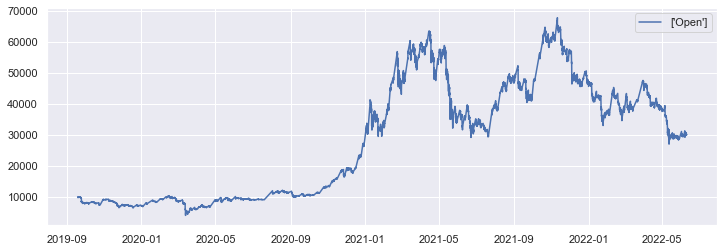

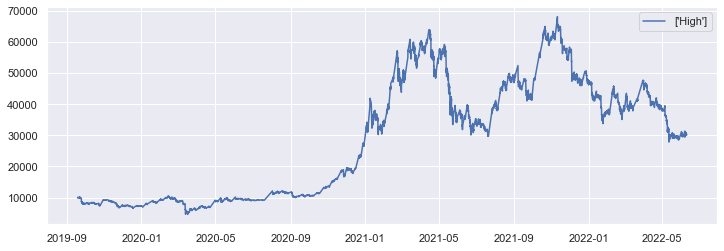

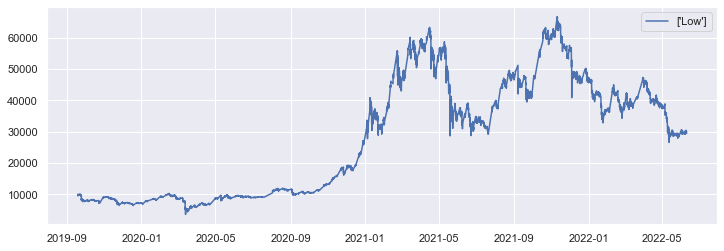

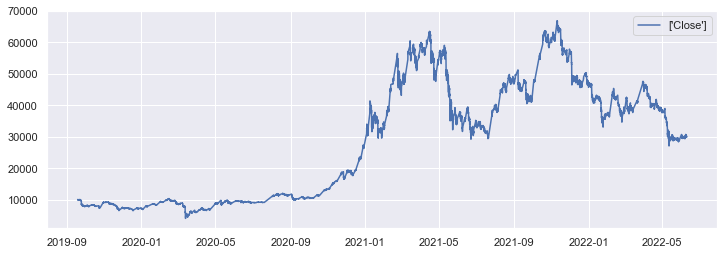

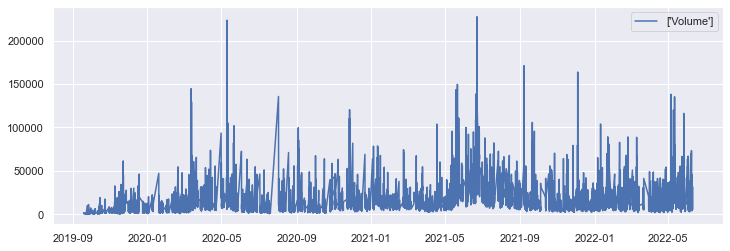

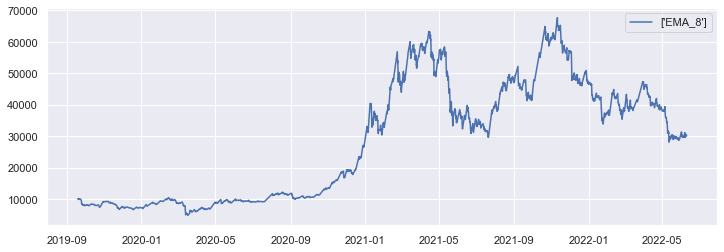

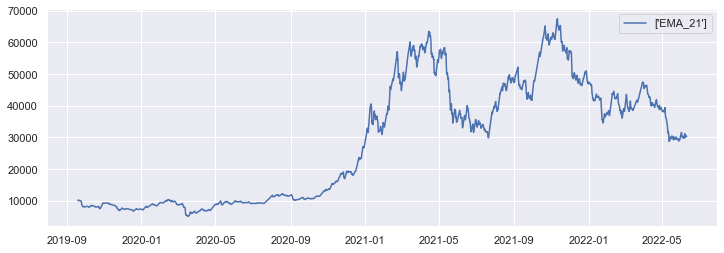

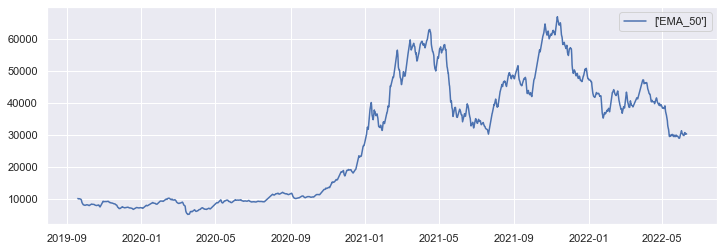

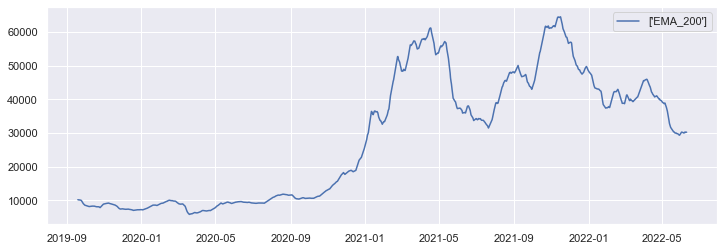

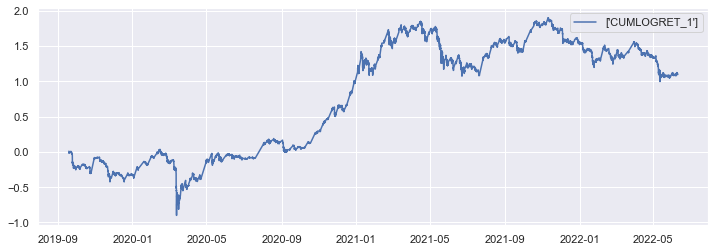

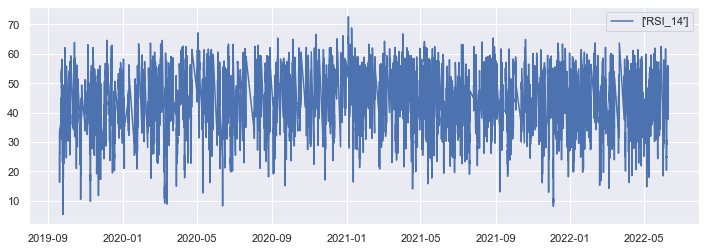

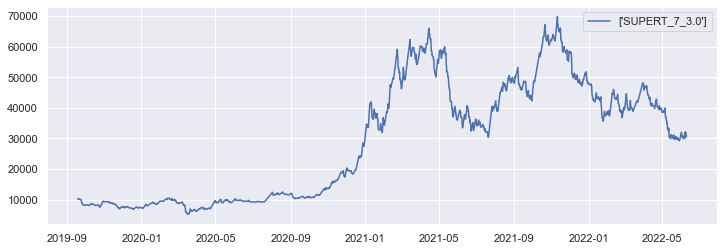

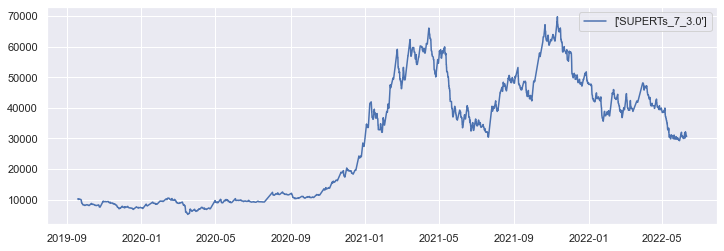

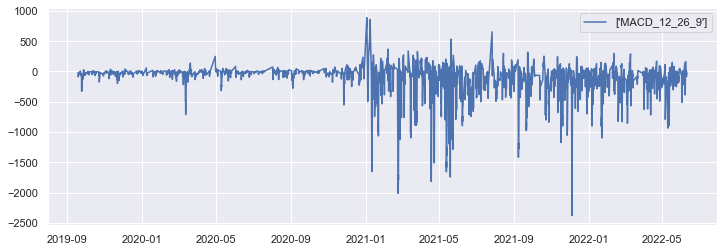

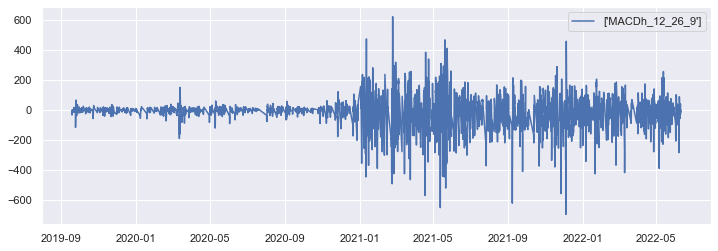

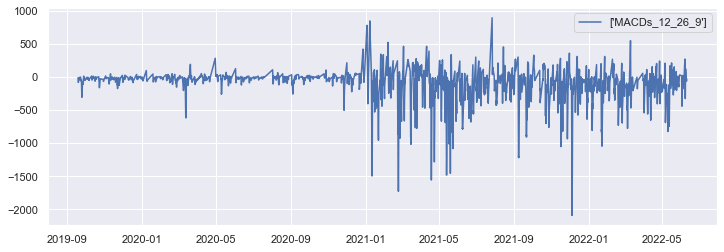

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Lineplot of all columns

for i in df.columns:
    plt.figure(figsize=(12,4))
    plt.plot(df[i], color = "b", label = [i])
    plt.legend(loc="best")
    plt.show()

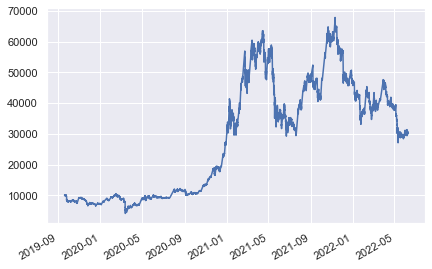

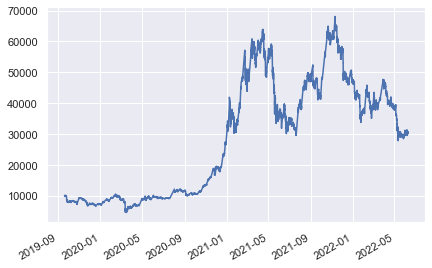

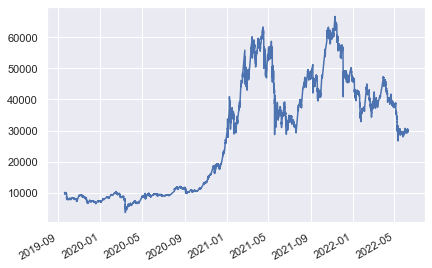

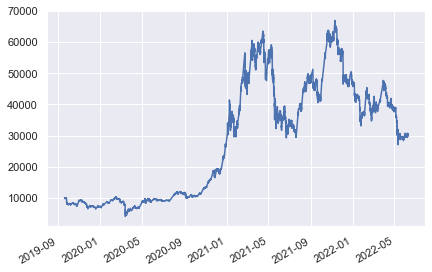

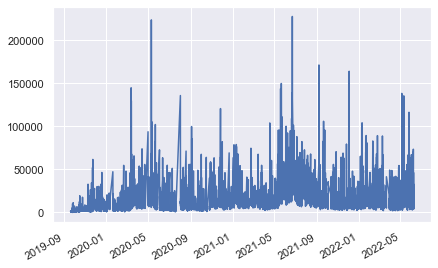

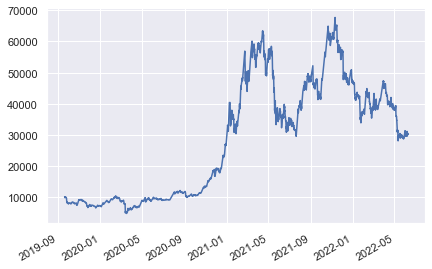

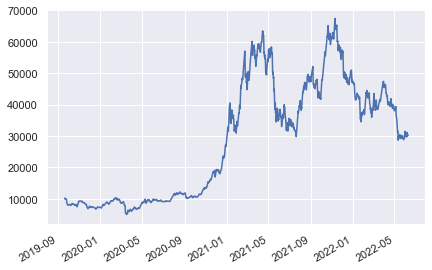

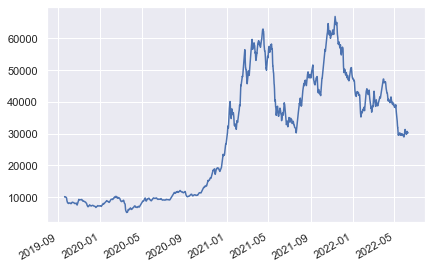

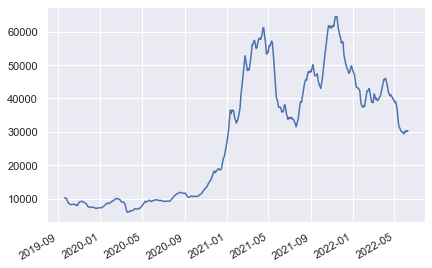

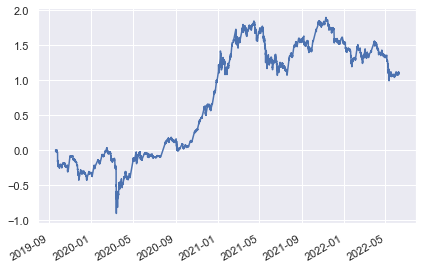

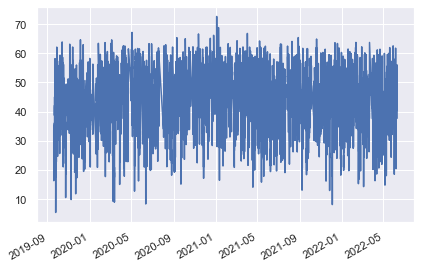

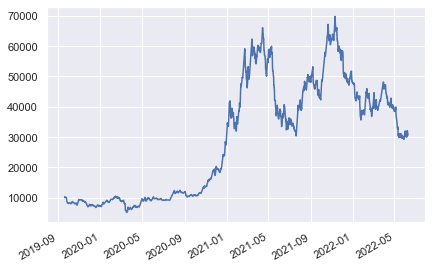

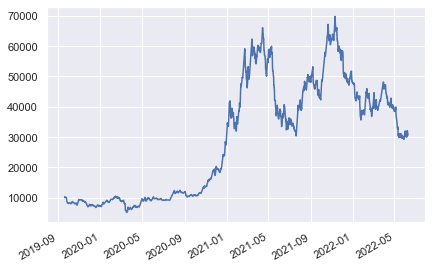

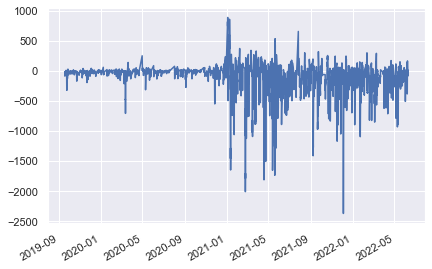

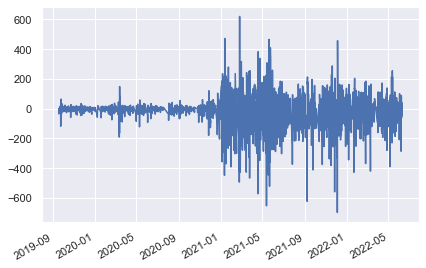

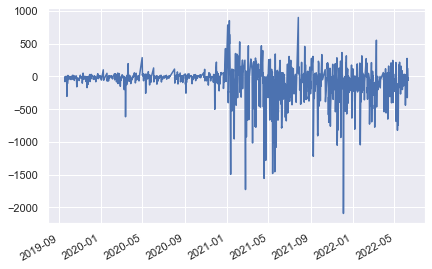

In [68]:
for i in df.columns:
    index=df.index
    share=df[i]

    figure,axis=plt.subplots()
    plt.tight_layout()
    
    ## Preventing overlapping
    figure.autofmt_xdate()
    axis.plot(index,share)

Open 0.22024747497949831
High 0.2173114157963558
Low 0.22363048895594967
Close 0.22023645237981018
Volume 3.5809224026041244
EMA_8 0.21865550033356826
EMA_21 0.2156421007508058
EMA_50 0.2099345168502733
EMA_200 0.1893191128754902
CUMLOGRET_1 -0.20775551693828032
RSI_14 -0.42654889504632004
SUPERT_7_3.0 0.20903620167558246
SUPERTs_7_3.0 0.20903620167558246
MACD_12_26_9 -2.440095218553245
MACDh_12_26_9 -0.6956423181798045
MACDs_12_26_9 -2.247695590970179


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


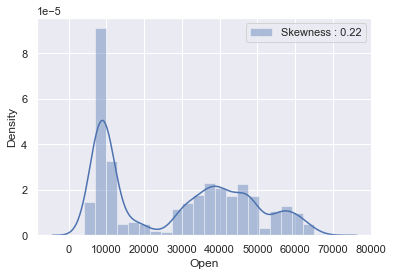

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


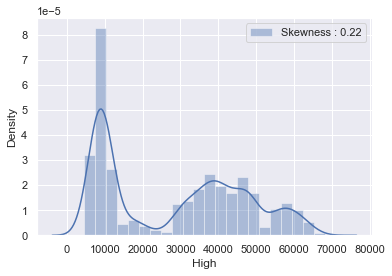

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


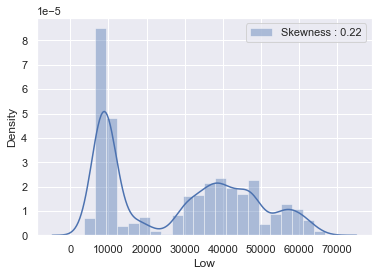

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


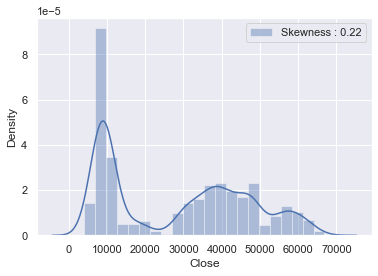

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


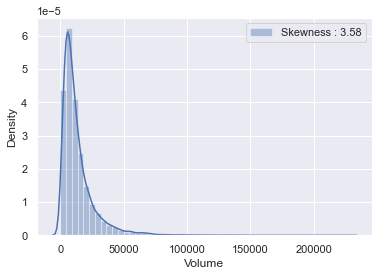

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


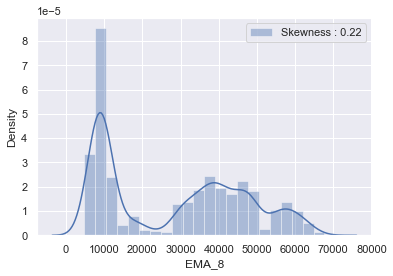

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


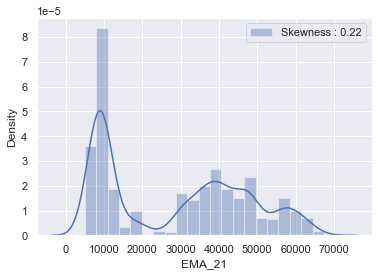

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


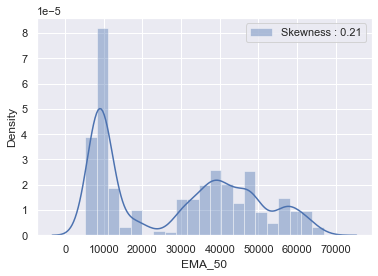

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


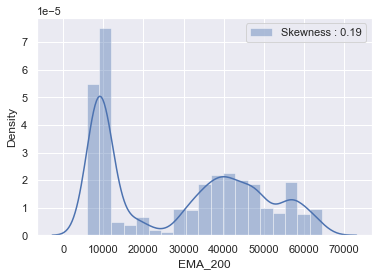

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


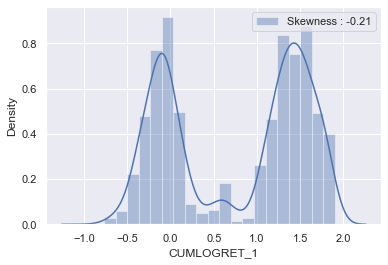

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


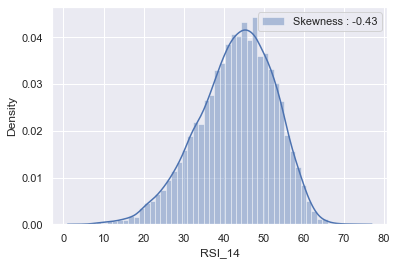

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


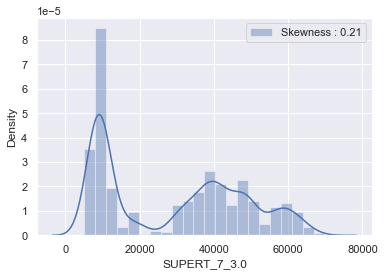

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


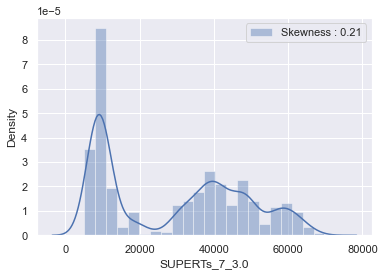

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


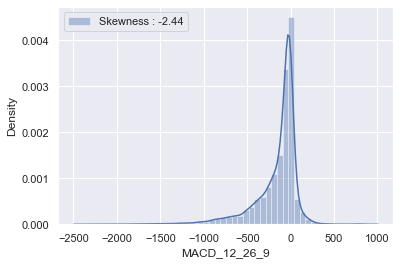

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


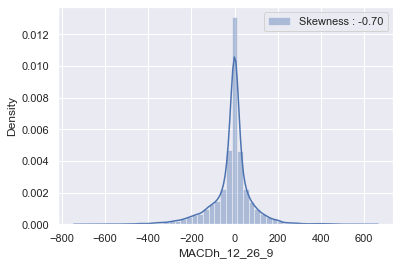

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


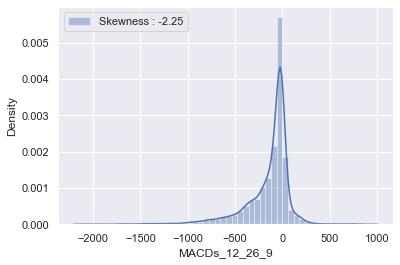

In [69]:
# Plot the histogram of all the columns to see the distribution of data and skewness

from scipy.stats import skew


for i in df.columns:
    print(i, skew(df[i]))

for i in df.columns:
    g = sns.distplot(df[i], color = "b", label = "Skewness : %.2f"%(df[i].skew()))
    g= g.legend(loc="best")
    plt.show()




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

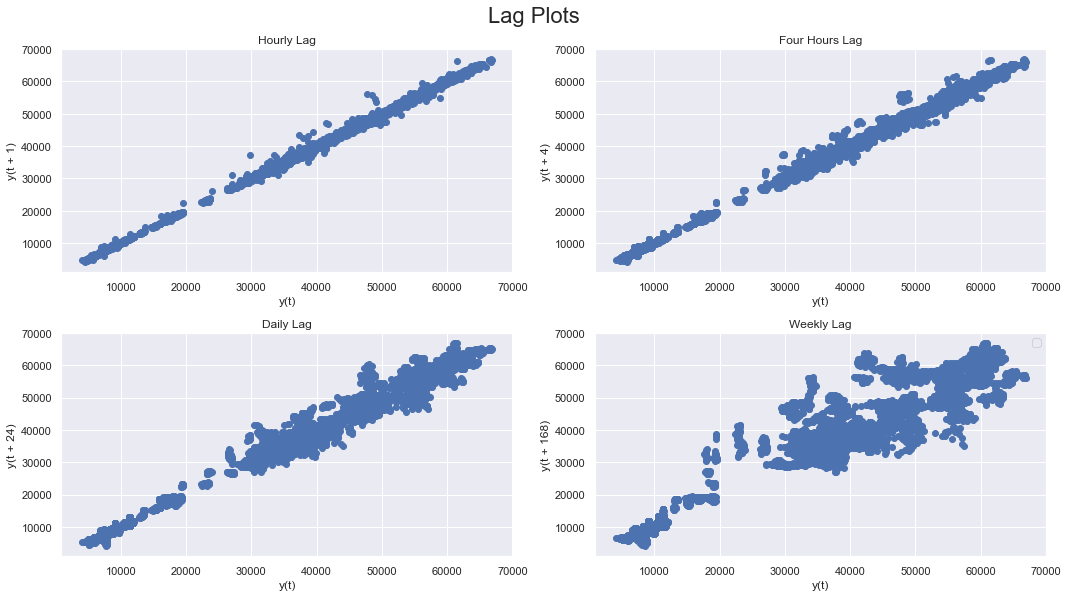

In [82]:
# Lag_Plot of data
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.lag_plot.html

plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)


plt.subplot(3,2,1)
pd.plotting.lag_plot(df['Close'], lag=1) #One Hour
plt.title('Hourly Lag')

plt.subplot(3,2,2)
pd.plotting.lag_plot(df['Close'], lag=4) #Four Hours
plt.title('Four Hours Lag')

plt.subplot(3,2,3)
pd.plotting.lag_plot(df['Close'], lag=24) #Daily
plt.title('Daily Lag')

plt.subplot(3,2,4)
pd.plotting.lag_plot(df['Close'], lag=24*7) #Daily
plt.title('Weekly Lag')

plt.legend()
plt.tight_layout()
plt.show()

In [83]:
## Resampling Time
## https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

df.index

DatetimeIndex(['2019-09-19 02:00:00', '2019-09-19 03:00:00',
               '2019-09-19 04:00:00', '2019-09-19 05:00:00',
               '2019-09-19 06:00:00', '2019-09-19 07:00:00',
               '2019-09-19 08:00:00', '2019-09-19 09:00:00',
               '2019-09-19 10:00:00', '2019-09-19 11:00:00',
               ...
               '2022-06-09 15:00:00', '2022-06-09 16:00:00',
               '2022-06-09 17:00:00', '2022-06-09 18:00:00',
               '2022-06-09 19:00:00', '2022-06-09 20:00:00',
               '2022-06-09 21:00:00', '2022-06-09 22:00:00',
               '2022-06-09 23:00:00', '2022-06-10 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=12274, freq=None)

In [84]:
# Calender week frequency
df.resample(rule ='W').min().Close

Time
2019-09-22     9821.91
2019-09-29     7921.00
2019-10-06     7753.80
2019-10-13     7808.37
2019-10-20     7877.02
                ...   
2022-05-15    27079.00
2022-05-22    28700.60
2022-05-29    28382.50
2022-06-05    29462.20
2022-06-12    29378.70
Freq: W-SUN, Name: Close, Length: 143, dtype: float64

<AxesSubplot:xlabel='Time'>

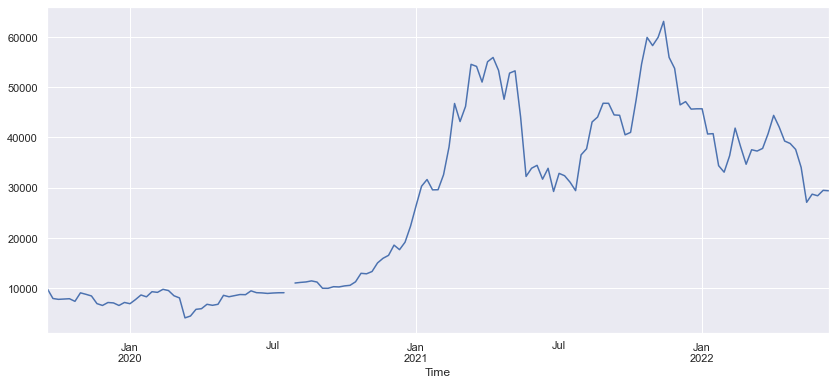

In [85]:
# Calender week frequency
df.resample(rule ='W').min().Close.plot()

<AxesSubplot:xlabel='Time'>

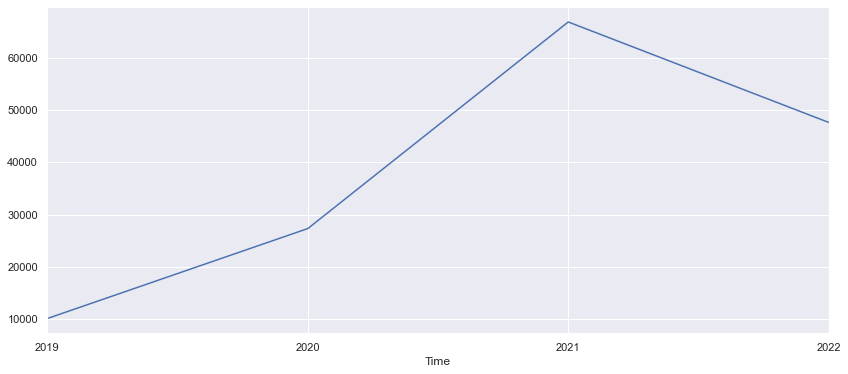

In [86]:
##year end frequency
df.resample(rule='A').max()['Close'].plot()

<AxesSubplot:xlabel='Time'>

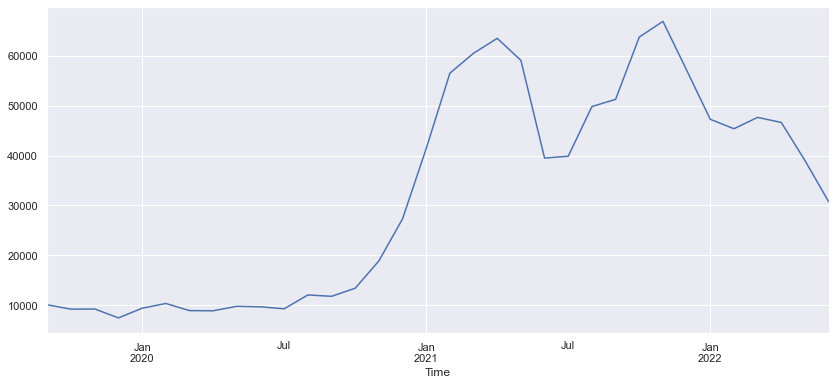

In [87]:
##Month start frequency
df.resample(rule='MS').max()['Close'].plot()

<AxesSubplot:xlabel='Time'>

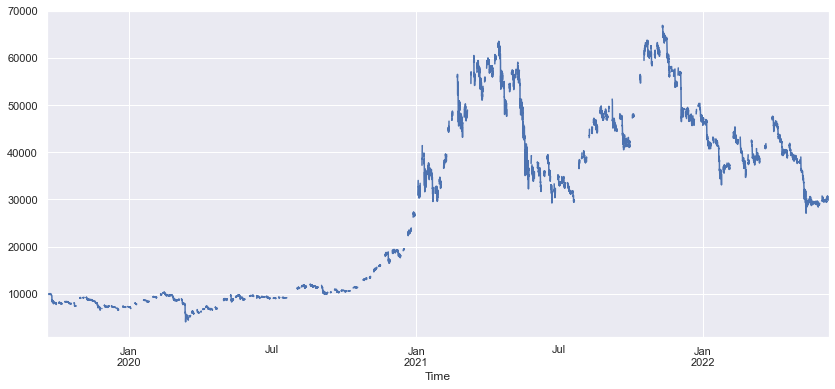

In [88]:
##Hourly frequency
df.resample(rule='H').max()['Close'].plot()

<AxesSubplot:xlabel='Time'>

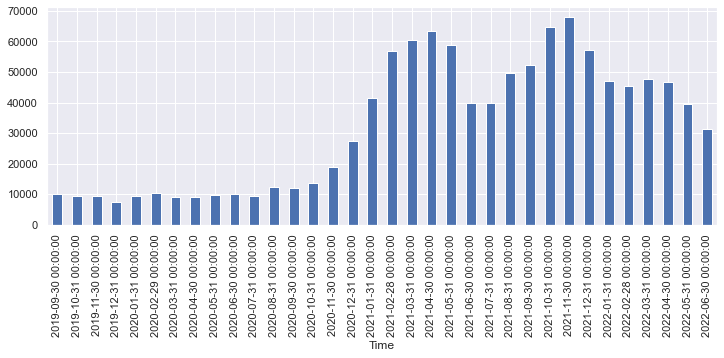

In [89]:
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(12,4))

In [90]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_8', 'EMA_21', 'EMA_50',
       'EMA_200', 'CUMLOGRET_1', 'RSI_14', 'SUPERT_7_3.0', 'SUPERTs_7_3.0',
       'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9'],
      dtype='object')

<AxesSubplot:xlabel='Time'>

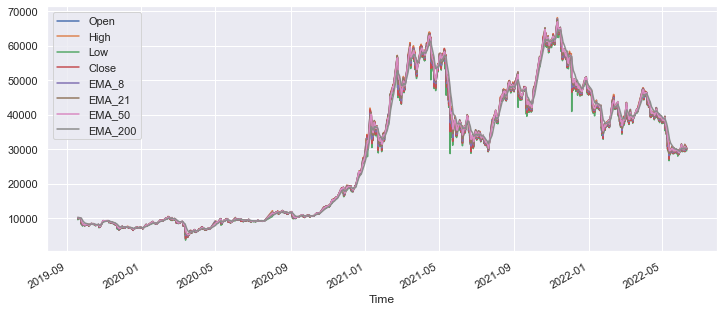

In [91]:

df[['Open', 'High', 'Low', 'Close','EMA_8', 'EMA_21', 'EMA_50','EMA_200']].plot(figsize=(12,5))

<AxesSubplot:>

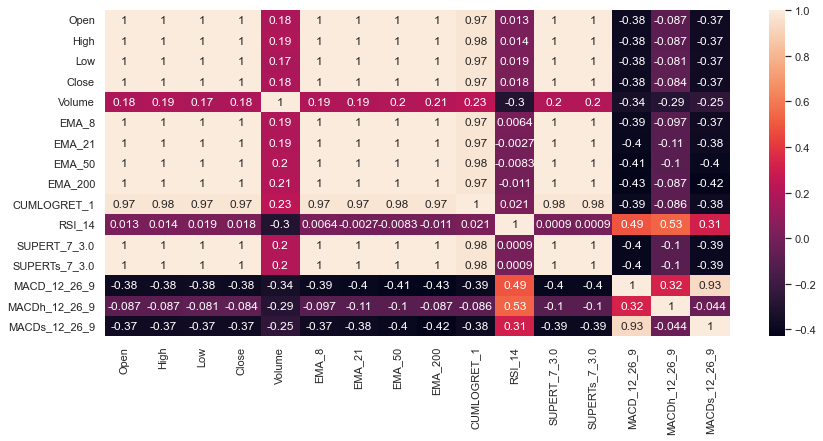

In [92]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Time'>

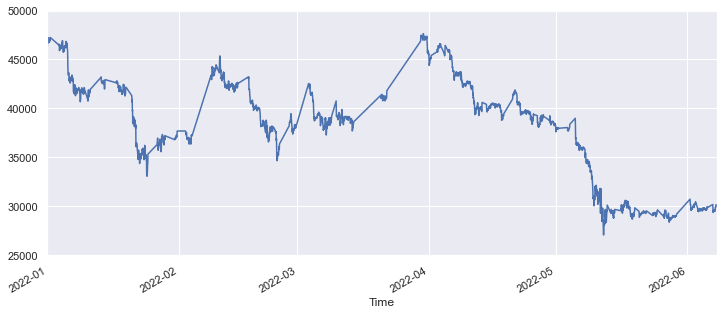

In [93]:
## xlimit and y limit
df['Close'].plot(xlim=['2022-01-01','2022-06-08'],ylim=[25000,50000],figsize=(12,5))

In [94]:
df.Close

Time
2019-09-19 02:00:00    10093.66
2019-09-19 03:00:00     9821.97
2019-09-19 04:00:00     9821.91
2019-09-19 05:00:00     9893.16
2019-09-19 06:00:00     9867.99
                         ...   
2022-06-09 20:00:00    30178.90
2022-06-09 21:00:00    30125.90
2022-06-09 22:00:00    30058.90
2022-06-09 23:00:00    30093.30
2022-06-10 00:00:00    29849.90
Name: Close, Length: 12274, dtype: float64